### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [64]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [66]:
missing_value = data.isnull().sum()
print('Missing Value in each column:\n', missing_value)

Missing Value in each column:
 destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


In [67]:
percentage_missing_value = {column: value / len(data) for column, value in missing_value.items()}
percentage_missing_value

{'destination': 0.0,
 'passanger': 0.0,
 'weather': 0.0,
 'temperature': 0.0,
 'time': 0.0,
 'coupon': 0.0,
 'expiration': 0.0,
 'gender': 0.0,
 'age': 0.0,
 'maritalStatus': 0.0,
 'has_children': 0.0,
 'education': 0.0,
 'occupation': 0.0,
 'income': 0.0,
 'car': 0.9914853358561968,
 'Bar': 0.008435824660990224,
 'CoffeeHouse': 0.017108167770419427,
 'CarryAway': 0.011904761904761904,
 'RestaurantLessThan20': 0.010249132765689057,
 'Restaurant20To50': 0.014900662251655629,
 'toCoupon_GEQ5min': 0.0,
 'toCoupon_GEQ15min': 0.0,
 'toCoupon_GEQ25min': 0.0,
 'direction_same': 0.0,
 'direction_opp': 0.0,
 'Y': 0.0}

99.14 % of car values are missing. This is an indication that the data collection process has flawed. Therefore, I will dropped the column.
Others value only account for less than 2% of missing value.
Since the proportion of missing data is not exceedingly high. I will impute the missing data with the most frequent category, its mode.


3. Decide what to do about your missing data -- drop, replace, other...

In [76]:
# drop car column
# data = data.drop('car', axis=1)

# update missing value
missing_value = data.isnull().sum()
missing_col = [column for column, value in missing_value.items() if value > 0]

# loop through each column individually and find common value of each column then impute each column individually.

for column in missing_col:
    mode_value = data[column].mode()[0]
    data[column].fillna(mode_value, inplace=True)


In [78]:
# check missing value
data.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

no more missing values!

4. What proportion of the total observations chose to accept the coupon? 



In [89]:
proportion_acceptance_rate = data.Y.mean()
print(f"The proportion of observations that accepted the coupon is: {proportion_acceptance_rate}")

value_count_Y = data.Y.value_counts()
value_count_Y

The proportion of observations that accepted the coupon is: 0.5684326710816777


Y
1    7210
0    5474
Name: count, dtype: int64

5. Use a bar plot to visualize the `coupon` column.

In [108]:


bar_plot_coupon = px.bar(data, x='coupon', color='coupon', title="Bar Graph - Counts of Each Coupon's Category", labels={'coupon': 'Coupon Category'})
bar_plot_coupon.show()

6. Use a histogram to visualize the temperature column.

In [119]:
hist_plot_temp = px.histogram(data, x='temperature', color='temperature', title="Histogram Graph - Counts of Each Temperature's Category", nbins=3)
hist_plot_temp.show()

In [146]:
# find the average and the frequency of acceptance rate given groupy of occupation and income
acceptance_rateCounts_by_group = data.groupby(['occupation', 'income'])['Y'].agg(['mean', 'count']).reset_index()

# rename the columns
acceptance_rateCounts_by_group.rename(columns={'mean': 'Acceptance_Rate', 'count': 'Total_Count'}, inplace=True)

# sort the value in descending values
sorted_group = acceptance_rateCounts_by_group.sort_values(by='Acceptance_Rate', ascending=False)


In [147]:
fig = px.bar(
    acceptance_rateCounts_by_group,
    x='occupation', 
    y='Acceptance_Rate', 
    color='income', 
    title='Coupon Acceptance Rate by Occupation and Annual Income',
    labels={'Acceptance_Rate': 'Acceptance Rate', 'occupation': 'Occupation', 'annual_income': 'Annual Income'}
)

# Update layout for better readability
fig.update_layout(
    xaxis_title='Occupation',
    yaxis_title='Acceptance Rate',
    legend_title='Annual Income',
    xaxis_tickangle=-45,  # Rotate the x-axis labels
    barmode='group',  # This is the default, but it's here for clarity
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="right",
        x=1.01
    )
)

# Show the plot
fig.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


2. What proportion of bar coupons were accepted?


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

1. Would annual occupation affecting the rate of acceptance?

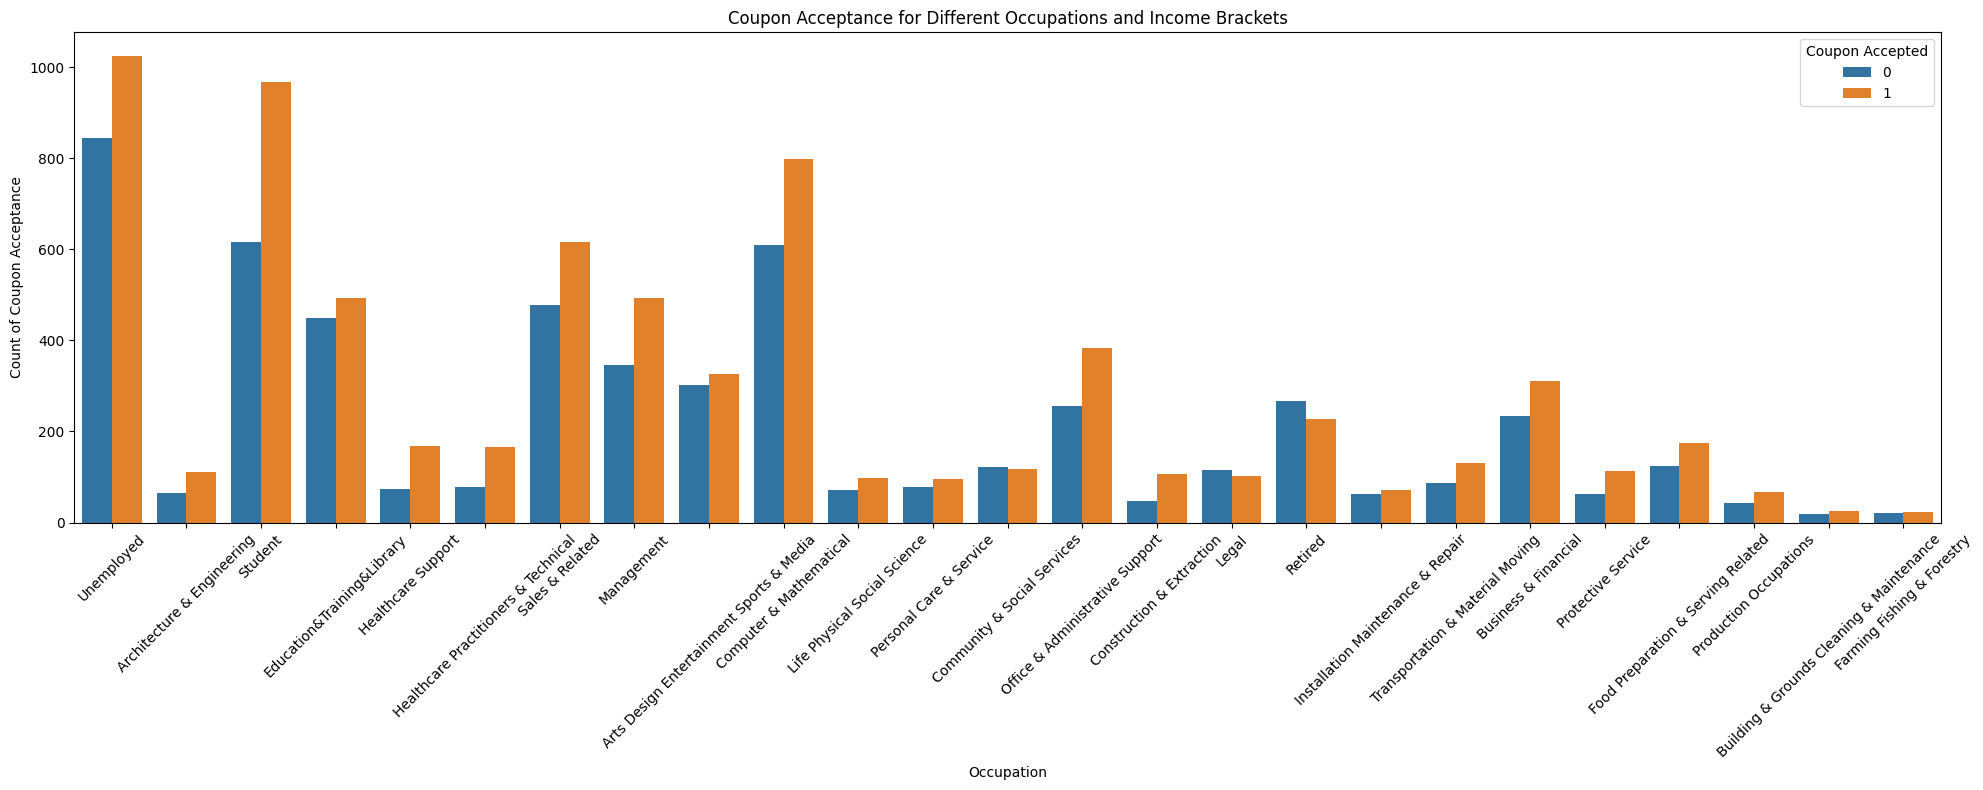

In [148]:
# choose a big figure for visibility
plt.figure(figsize=(20, 8)) 

sns.countplot(x='occupation', hue='Y', data=data)

plt.title('Coupon Acceptance for Different Occupations and Income Brackets')
plt.xlabel('Occupation')
plt.ylabel('Count of Coupon Acceptance')

# rotate the x-axis for readability
plt.xticks(rotation=45)  
plt.legend(title='Coupon Accepted', loc='upper right')  # Adjust legend position as needed
plt.tight_layout()  # Adjust the layout
plt.show()

This is an interesting graph. By observation, we see that unemployment accept the most coupon. This intuitively makes sense because they don't earn a lot of money to taking any discount would save themm financially. Another cool observation would be between student and Architecture and Engineering, there is a wide imbalance between the two group acceptance rate. This intuitively makes sense also because student tends to make no mmoney and they would appreciate coupon to save some money.

Overall, what I observe is that most blue collar job accept less coupon. My guess is because they are less involve in the digital world where I believe to be the most marketing. White collar jobs tend to involve more around the media and tech in general, therefore, they are mmore expose to digital advertisement.

2. What about income, does it affect the acceptance rate?

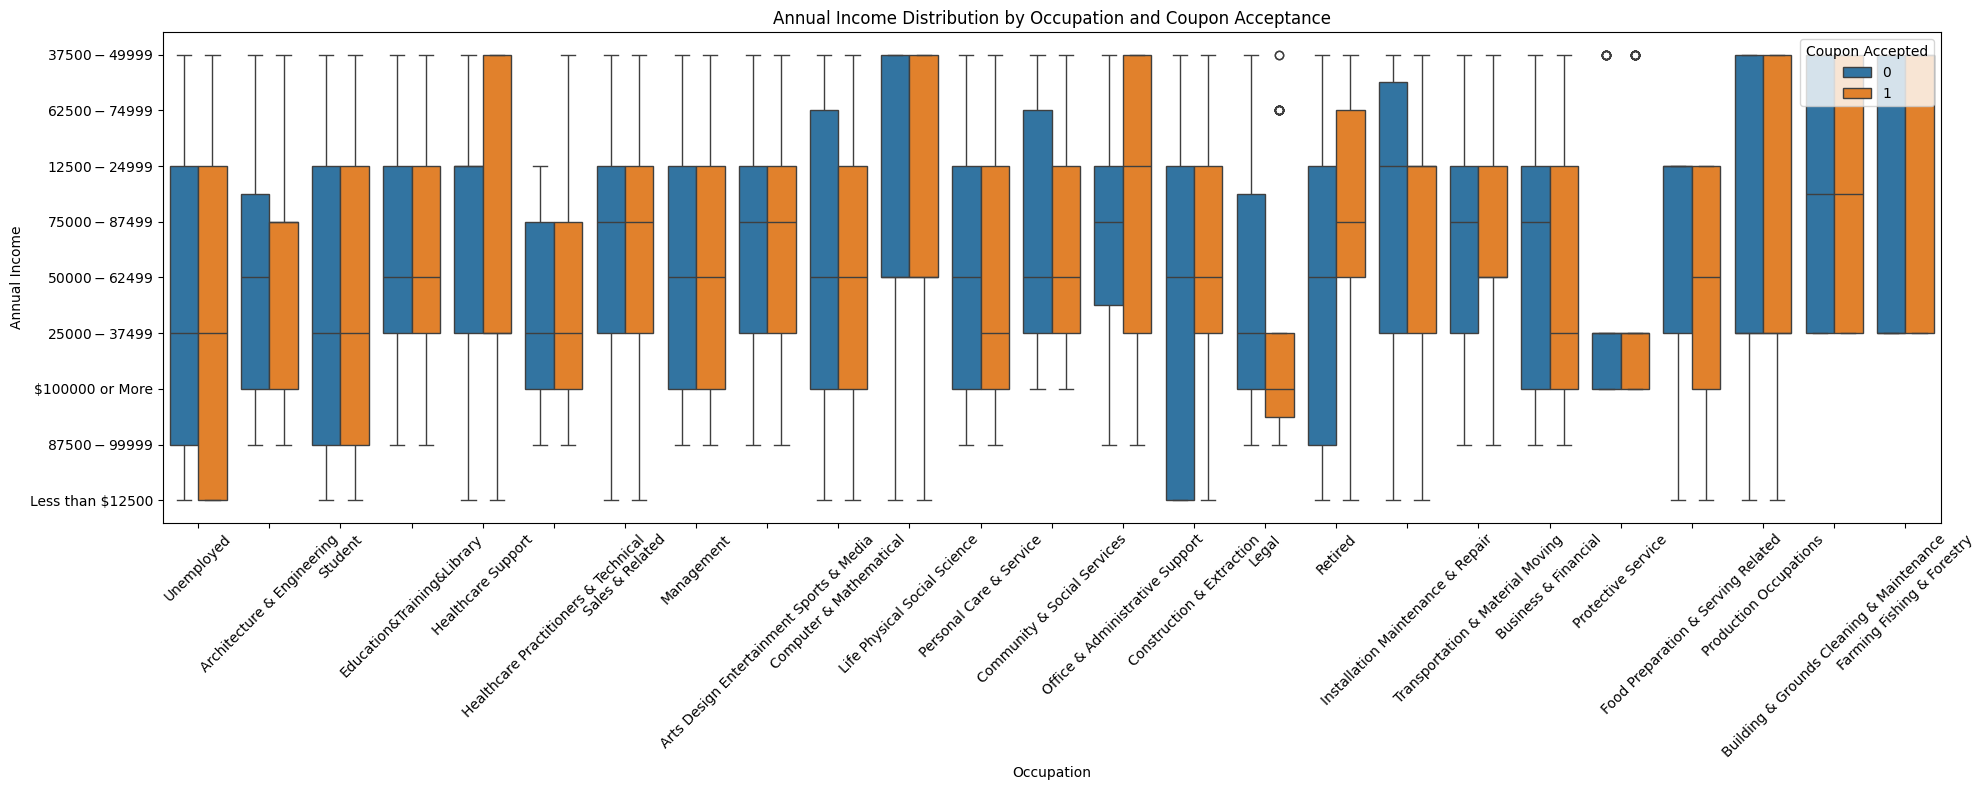

In [153]:
plt.figure(figsize=(20, 8))

sns.boxplot(x='occupation', y='income', hue='Y', data=data)

plt.title('Annual Income Distribution by Occupation and Coupon Acceptance')
plt.xlabel('Occupation')
plt.ylabel('Annual Income')
plt.xticks(rotation=45)  # Rotates the x labels to avoid overlapping, adjust angle as needed
plt.legend(title='Coupon Accepted', loc='upper right')  # Adjust legend position as needed
plt.tight_layout()  # Adjust the layout
plt.show()

3. What is the average acceptance and its count within a certain group of occupation and income?

In [154]:
# find the average and the frequency of acceptance rate given groupy of occupation and income
acceptance_rateCounts_by_group = data.groupby(['occupation', 'income'])['Y'].agg(['mean', 'count']).reset_index()

# rename the columns
acceptance_rateCounts_by_group.rename(columns={'mean': 'Acceptance_Rate', 'count': 'Total_Count'}, inplace=True)

# sort the value in descending values
sorted_group = acceptance_rateCounts_by_group.sort_values(by='Acceptance_Rate', ascending=False)


In [155]:
fig = px.bar(
    acceptance_rateCounts_by_group,
    x='occupation', 
    y='Acceptance_Rate', 
    color='income', 
    title='Coupon Acceptance Rate by Occupation and Annual Income',
    labels={'Acceptance_Rate': 'Acceptance Rate', 'occupation': 'Occupation', 'annual_income': 'Annual Income'}
)

# Update layout for better readability
fig.update_layout(
    xaxis_title='Occupation',
    yaxis_title='Acceptance Rate',
    legend_title='Annual Income',
    xaxis_tickangle=-45,  # Rotate the x-axis labels
    barmode='group',  # This is the default, but it's here for clarity
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="right",
        x=1.01
    ),
    autosize=False,
    width=1200,  # Width of figure in pixels
    height=800
)

# Show the plot
fig.show()